In [121]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import plot_confusion_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [113]:
df=pd.read_excel('updated_data.xlsx')

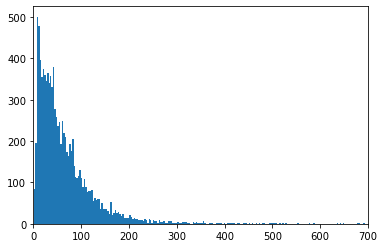

In [144]:
df1 = df
df1['length'] = 0

a = 0
for i, row in df1.iterrows():
    l = len(row['comment_text'])
    df1.at[i,'length'] = l

length_array = df1['length'].to_numpy()

fig, ax = plt.subplots()
ax.hist(length_array, bins=1000)
 
# Show plot
plt.xlim(0,700)
plt.show()

## Support Vector Classifier

accuracy  :  83.09887662416072
Precision :  96.77631849609021
F1 Score  :  88.99660800054106
Recall    :  83.09887662416072


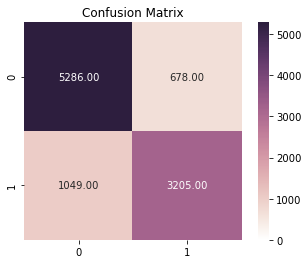

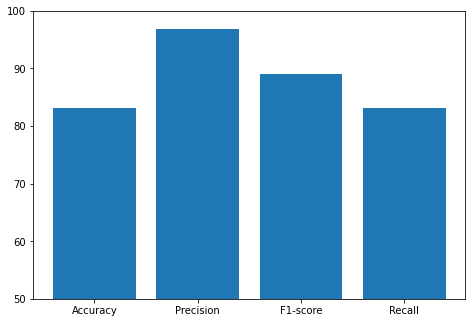

In [114]:
accuracy = 0.0
precision = 0.0
f_score = 0.0
recall = 0.0
n = 10
v = TfidfVectorizer()
conf_m_svc = 0
x = df.comment_text
y = df.isAbusive


kf = KFold(n_splits=n)
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    model_svc = SVC(kernel='rbf')

    X_train_vector = v.fit_transform(X_train.values)
    X_test_vector = v.transform(X_test.values)
    
    model_svc.fit(X_train_vector,y_train)
    
    y_pred = model_svc.predict(X_test_vector)

    conf_m_svc = conf_m_svc + confusion_matrix(y_test, y_pred)
    accuracy = accuracy + accuracy_score(y_test, y_pred)
    precision = precision + precision_score(y_test, y_pred,average='weighted')
    f_score = f_score + f1_score(y_test, y_pred,average='weighted')
    recall = recall + recall_score(y_test, y_pred,average='weighted')

    
accuracy  = (accuracy/n) * 100
precision = (precision/n) * 100
f_score  = (f_score/n) * 100
recall    = (recall/n) * 100

performance_svc = {"accuracy" : accuracy, 
                   "precision" : precision,
                   "f1-score" : f_score,
                   "recall": recall} 

print("accuracy  : " , performance_svc['accuracy'])
print("Precision : " , performance_svc['precision'])
print("F1 Score  : " , performance_svc['f1-score'])
print("Recall    : " , performance_svc['recall'])


fig = plt.figure()
plt.clf()

ax = fig.add_subplot()
ax.set_aspect(1)

cmap = sb.cubehelix_palette(light=1, as_cmap=True)
res = sb.heatmap(conf_m_svc, annot=True, vmin=0.0, vmax=np.max(conf_m_svc), fmt='.2f', cmap=cmap)

plt.title('Confusion Matrix')
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Accuracy', 'Precision', 'F1-score', 'Recall']
value = [performance_svc['accuracy'],performance_svc['precision'],performance_svc['f1-score'],performance_svc['recall']]
ax.bar(label,value)
plt.ylim(50,100)
plt.show()

## Logistic Regression

accuracy  :  79.13525360770205
Precision :  96.51041439797154
F1 Score  :  86.46252995466963
Recall    :  79.13525360770205


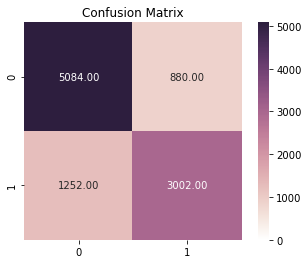

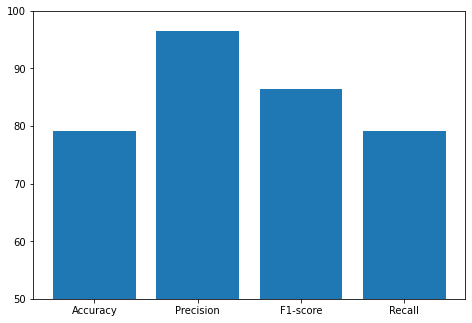

In [115]:
accuracy = 0.0
precision = 0.0
f_score = 0.0
recall = 0.0
n = 10
v = TfidfVectorizer()
conf_m_logistic = 0
x = df.comment_text
y = df.isAbusive


kf = KFold(n_splits=n)
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    model_logistic = LogisticRegression()

    X_train_vector = v.fit_transform(X_train.values)
    X_test_vector = v.transform(X_test.values)
    
    model_logistic.fit(X_train_vector,y_train)
    
    y_pred = model_logistic.predict(X_test_vector)

    conf_m_logistic = conf_m_logistic + confusion_matrix(y_test, y_pred)
    accuracy = accuracy + accuracy_score(y_test, y_pred)
    precision = precision + precision_score(y_test, y_pred,average='weighted')
    f_score = f_score + f1_score(y_test, y_pred,average='weighted')
    recall = recall + recall_score(y_test, y_pred,average='weighted')

    
accuracy  = (accuracy/n) * 100
precision = (precision/n) * 100
f_score  = (f_score/n) * 100
recall    = (recall/n) * 100

performance_logistic = {"accuracy" : accuracy, 
                   "precision" : precision,
                   "f1-score" : f_score,
                   "recall": recall} 

print("accuracy  : " , performance_logistic['accuracy'])
print("Precision : " , performance_logistic['precision'])
print("F1 Score  : " , performance_logistic['f1-score'])
print("Recall    : " , performance_logistic['recall'])


fig = plt.figure()
plt.clf()

ax = fig.add_subplot()
ax.set_aspect(1)

cmap = sb.cubehelix_palette(light=1, as_cmap=True)
res = sb.heatmap(conf_m_logistic, annot=True, vmin=0.0, vmax=np.max(conf_m_logistic), fmt='.2f', cmap=cmap)

plt.title('Confusion Matrix')
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Accuracy', 'Precision', 'F1-score', 'Recall']
value = [performance_logistic['accuracy'],performance_logistic['precision'],performance_logistic['f1-score'],performance_logistic['recall']]
ax.bar(label,value)
plt.ylim(50,100)
plt.show()

## Naieve Bayes

accuracy  :  76.11228774981743
Precision :  96.04899192490345
F1 Score  :  82.79316522537886
Recall    :  76.11228774981743


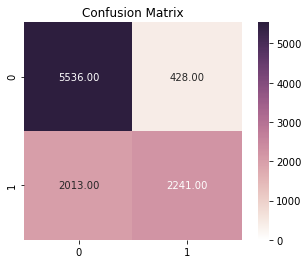

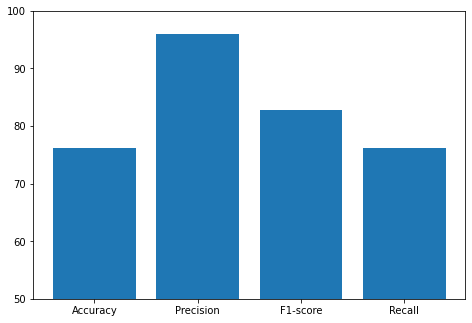

In [116]:
accuracy = 0.0
precision = 0.0
f_score = 0.0
recall = 0.0
n = 10
v = TfidfVectorizer()
conf_m_nb = 0
x = df.comment_text
y = df.isAbusive


kf = KFold(n_splits=n)
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    model_nb = MultinomialNB()

    X_train_vector = v.fit_transform(X_train.values)
    X_test_vector = v.transform(X_test.values)
    
    model_nb.fit(X_train_vector,y_train)
    
    y_pred = model_nb.predict(X_test_vector)

    conf_m_nb = conf_m_nb + confusion_matrix(y_test, y_pred)
    accuracy = accuracy + accuracy_score(y_test, y_pred)
    precision = precision + precision_score(y_test, y_pred,average='weighted')
    f_score = f_score + f1_score(y_test, y_pred,average='weighted')
    recall = recall + recall_score(y_test, y_pred,average='weighted')

    
accuracy  = (accuracy/n) * 100
precision = (precision/n) * 100
f_score  = (f_score/n) * 100
recall    = (recall/n) * 100

performance_nb = {"accuracy" : accuracy, 
                   "precision" : precision,
                   "f1-score" : f_score,
                   "recall": recall} 

print("accuracy  : " , performance_nb['accuracy'])
print("Precision : " , performance_nb['precision'])
print("F1 Score  : " , performance_nb['f1-score'])
print("Recall    : " , performance_nb['recall'])


fig = plt.figure()
plt.clf()

ax = fig.add_subplot()
ax.set_aspect(1)

cmap = sb.cubehelix_palette(light=1, as_cmap=True)
res = sb.heatmap(conf_m_nb, annot=True, vmin=0.0, vmax=np.max(conf_m_nb), fmt='.2f', cmap=cmap)

plt.title('Confusion Matrix')
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Accuracy', 'Precision', 'F1-score', 'Recall']
value = [performance_nb['accuracy'],performance_nb['precision'],performance_nb['f1-score'],performance_nb['recall']]
ax.bar(label,value)
plt.ylim(50,100)
plt.show()

## Decision Tree

accuracy  :  75.00481090830333
Precision :  95.41603410279056
F1 Score  :  83.48920728952447
Recall    :  75.00481090830333


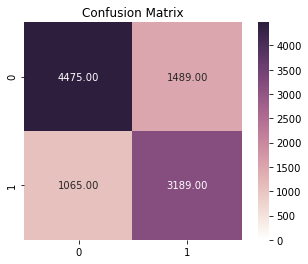

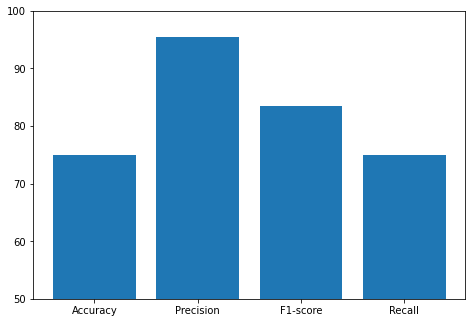

In [117]:
accuracy = 0.0
precision = 0.0
f_score = 0.0
recall = 0.0
n = 10
v = TfidfVectorizer()
conf_m_dt = 0
x = df.comment_text
y = df.isAbusive

tp = 0
fp = 0
tn = 0
fn = 0

kf = KFold(n_splits=n)
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    model_dt = DecisionTreeClassifier(random_state=0, max_depth=100)

    X_train_vector = v.fit_transform(X_train.values)
    X_test_vector = v.transform(X_test.values)
    
    model_dt.fit(X_train_vector,y_train)
    
    y_pred = model_dt.predict(X_test_vector)

    conf_m_dt = conf_m_dt + confusion_matrix(y_test, y_pred)
    accuracy = accuracy + accuracy_score(y_test, y_pred)
    precision = precision + precision_score(y_test, y_pred,average='weighted')
    f_score = f_score + f1_score(y_test, y_pred,average='weighted')
    recall = recall + recall_score(y_test, y_pred,average='weighted')

tp = conf_m_dt[1][1]
tn = conf_m_dt[0][0]
fp = conf_m_dt[0][1]
fn = conf_m_dt[1][0]

# precision = (tp/(tp+fp))
# recall = (tp/(tp+fn))
# f_score = (2*(precision*recall))/(precision*recall)
    
accuracy  = (accuracy/n) * 100
precision = (precision/n) * 100
f_score  = (f_score/n) * 100
recall    = (recall/n) * 100

performance_dt = {"accuracy" : accuracy, 
                   "precision" : precision,
                   "f1-score" : f_score,
                   "recall": recall} 

print("accuracy  : " , performance_dt['accuracy'])
print("Precision : " , performance_dt['precision'])
print("F1 Score  : " , performance_dt['f1-score'])
print("Recall    : " , performance_dt['recall'])


fig = plt.figure()
plt.clf()

ax = fig.add_subplot()
ax.set_aspect(1)

cmap = sb.cubehelix_palette(light=1, as_cmap=True)
res = sb.heatmap(conf_m_dt, annot=True, vmin=0.0, vmax=np.max(conf_m_dt), fmt='.2f', cmap=cmap)

plt.title('Confusion Matrix')
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Accuracy', 'Precision', 'F1-score', 'Recall']
value = [performance_dt['accuracy'],performance_dt['precision'],performance_dt['f1-score'],performance_dt['recall']]
ax.bar(label,value)
plt.ylim(50,100)
plt.show()

## Random Forrest

accuracy  :  79.08596575629969
Precision :  96.01300303167092
F1 Score  :  86.15381586342392
Recall    :  79.08596575629969


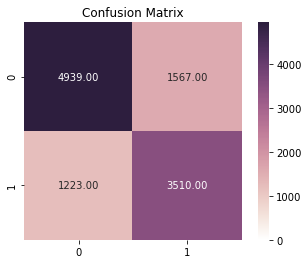

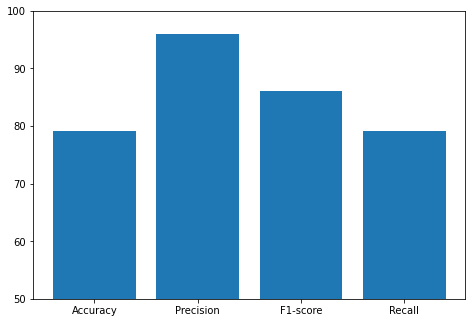

In [123]:
accuracy = 0.0
precision = 0.0
f_score = 0.0
recall = 0.0
n = 10
v = TfidfVectorizer()
conf_m_rf = 0
x = df.comment_text
y = df.isAbusive

tp = 0
fp = 0
tn = 0
fn = 0

kf = KFold(n_splits=n)
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    model_rf = RandomForestClassifier(max_depth=100, random_state=0)

    X_train_vector = v.fit_transform(X_train.values)
    X_test_vector = v.transform(X_test.values)
    
    model_rf.fit(X_train_vector,y_train)
    
    y_pred = model_rf.predict(X_test_vector)

    conf_m_rf = conf_m_dt + confusion_matrix(y_test, y_pred)
    accuracy = accuracy + accuracy_score(y_test, y_pred)
    precision = precision + precision_score(y_test, y_pred,average='weighted')
    f_score = f_score + f1_score(y_test, y_pred,average='weighted')
    recall = recall + recall_score(y_test, y_pred,average='weighted')

tp = conf_m_dt[1][1]
tn = conf_m_dt[0][0]
fp = conf_m_dt[0][1]
fn = conf_m_dt[1][0]

    
accuracy  = (accuracy/n) * 100
precision = (precision/n) * 100
f_score  = (f_score/n) * 100
recall    = (recall/n) * 100

performance_rf = {"accuracy" : accuracy, 
                   "precision" : precision,
                   "f1-score" : f_score,
                   "recall": recall} 

print("accuracy  : " , performance_rf['accuracy'])
print("Precision : " , performance_rf['precision'])
print("F1 Score  : " , performance_rf['f1-score'])
print("Recall    : " , performance_rf['recall'])


fig = plt.figure()
plt.clf()

ax = fig.add_subplot()
ax.set_aspect(1)

cmap = sb.cubehelix_palette(light=1, as_cmap=True)
res = sb.heatmap(conf_m_rf, annot=True, vmin=0.0, vmax=np.max(conf_m_rf), fmt='.2f', cmap=cmap)

plt.title('Confusion Matrix')
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Accuracy', 'Precision', 'F1-score', 'Recall']
value = [performance_rf['accuracy'],performance_rf['precision'],performance_rf['f1-score'],performance_rf['recall']]
ax.bar(label,value)
plt.ylim(50,100)
plt.show()

In [125]:
text = [
    'কুিত্তার বাচ্চা'
]
text_count = v.transform(text)
model.predict(text_count)

array([1], dtype=int64)

In [124]:
print(performance_svc)
print(performance_logistic)
print(performance_nb)
print(performance_dt)
print(performance_rf)

{'accuracy': 83.09887662416072, 'precision': 96.77631849609021, 'f1-score': 88.99660800054106, 'recall': 83.09887662416072}
{'accuracy': 79.13525360770205, 'precision': 96.51041439797154, 'f1-score': 86.46252995466963, 'recall': 79.13525360770205}
{'accuracy': 76.11228774981743, 'precision': 96.04899192490345, 'f1-score': 82.79316522537886, 'recall': 76.11228774981743}
{'accuracy': 75.00481090830333, 'precision': 95.41603410279056, 'f1-score': 83.48920728952447, 'recall': 75.00481090830333}
{'accuracy': 79.08596575629969, 'precision': 96.01300303167092, 'f1-score': 86.15381586342392, 'recall': 79.08596575629969}


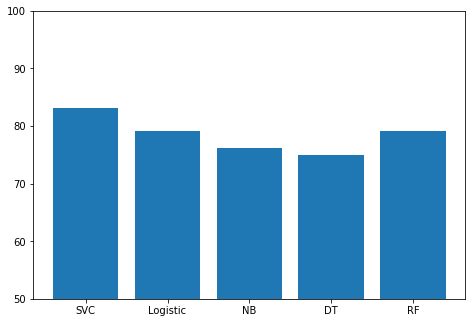

In [134]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['SVC', 'Logistic', 'NB', 'DT', 'RF']
value = [performance_svc['accuracy'],performance_logistic['accuracy'],performance_nb['accuracy'],performance_dt['accuracy'],performance_rf['accuracy']]
ax.bar(label,value)
plt.ylim(50,100)
plt.show()

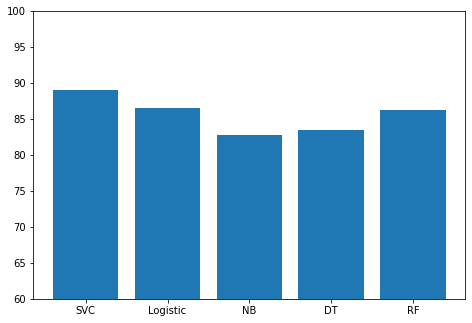

In [135]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['SVC', 'Logistic', 'NB', 'DT', 'RF']
value = [performance_svc['f1-score'],performance_logistic['f1-score'],performance_nb['f1-score'],performance_dt['f1-score'],performance_rf['f1-score']]
ax.bar(label,value)
plt.ylim(60,100)
plt.show()